### 1. Import Dependencies

In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.device_count())  # Number of available GPUs
print(torch.cuda.current_device())  # Current device being used by CUDA


True
1
0


### 2. Load CLIP Model

In [2]:
#import torch
import clip
import os
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
import pyclip
import io
import win32clipboard
import tkinter as tk
from PIL import Image, ImageTk


# Load the CLIP model (ViT-B/32 is the default)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


### 3. Extract Image Features

In [ ]:
# def extract_image_features(image_path):
#     image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
#     with torch.no_grad():
#         image_features = model.encode_image(image)
#     return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize

In [ ]:
# # Load images and compute embeddings
# image_folder = "illustration_dataset"
# image_features_dict = {}

# for filename in os.listdir(image_folder):
#     if filename.lower().endswith(("png", "jpg", "jpeg")):
#         image_path = os.path.join(image_folder, filename)
#         image_features_dict[filename] = extract_image_features(image_path)

# # Save image embeddings to a file
# torch.save(image_features_dict, "image_embeddings.pt")
# print("Image embeddings saved to 'image_embeddings.pt'")

### 4. Extract Text Features

In [3]:
def extract_text_features(text):
    status = widgets.Label(value="Ready")
    display(status)

    status.value = f"Processing: {text}"  # Update status
    
    text_tokenized = clip.tokenize([text]).to(device)

    status.value = "Encoding text with CLIP..."
    with torch.no_grad():
        text_features = model.encode_text(text_tokenized)
    
    status.value = "Normalizing features..."
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    status.value = "Extraction complete!"
    return text_features

In [ ]:
# Example text prompts
text_prompts = ["fisheye perspective, black hair", "fantasy landscape", "cyberpunk city", "red hair", "hoodie"]

# Compute and save text embeddings
text_features_dict = {prompt: extract_text_features(prompt) for prompt in text_prompts}
torch.save(text_features_dict, "text_embeddings.pt")
print("Text embeddings saved to 'text_embeddings.pt'")

## Load Embeddings

In [4]:
# Load image embeddings
image_features_dict = torch.load("image_embeddings.pt")

# Load text embeddings
text_features_dict = torch.load("text_embeddings.pt")

### 5. Comparison Computing

In [5]:
# Initialize status widget
status = widgets.Label(value="Ready")
display(status)

# Example query
query = "red, dark background"

# Get the text features for the query
if query in text_features_dict:
    text_features = text_features_dict[query]
    status.value = f"Found cached features for: {query}"
else:
    status.value = f"Computing features for: {query}"
    text_features = extract_text_features(query)  # Compute features if not cached
    status.value = f"Features extracted for: {query}"

# Compute cosine similarity with a progress bar
status.value = "Computing cosine similarity..."
similarities = {}
for img_name, img_features in tqdm(image_features_dict.items(), desc="Computing Similarity"):
    similarities[img_name] = torch.cosine_similarity(text_features, img_features, dim=-1).item()

# Sort results by similarity
sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

# Display top matches
status.value = "Displaying top matches..."
for img, score in sorted_images[:8]:
    print(f"{img}: {score:.4f}")

status.value = "Completed!"

Label(value='Ready')

Label(value='Ready')

Computing Similarity: 100%|██████████| 71091/71091 [00:24<00:00, 2891.32it/s]

85513643_p0_master1200.jpg: 0.3228
81701035_p0_master1200.jpg: 0.3184
85769338_p0_master1200.jpg: 0.3174
82384617_p0_master1200.jpg: 0.3164
79564520_p0_master1200.jpg: 0.3154
81122466_p0_master1200.jpg: 0.3154
81365678_p0_master1200.jpg: 0.3145
86402303_p0_master1200.jpg: 0.3123


# Singular Displays

### Display Across

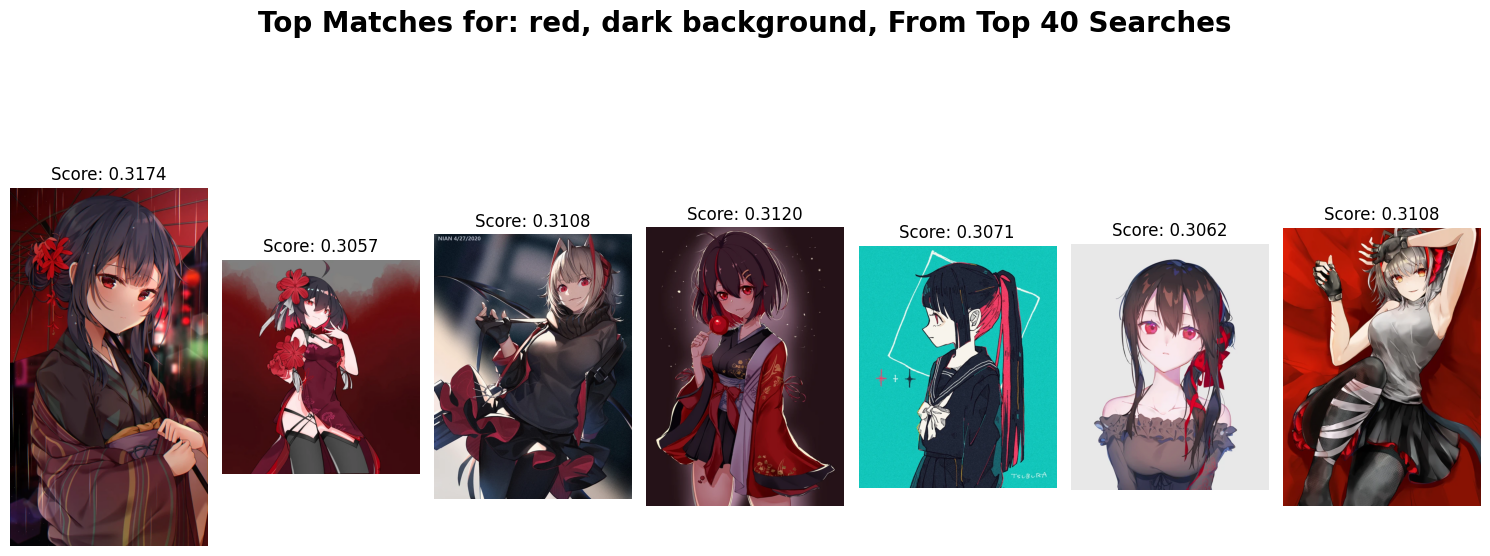

In [6]:
# Display top matches
top_k = 7  # Number of images to display
plt.figure(figsize=(15, 7))  # Set the figure size
image_folder = "illustration_dataset"

# Shuffle and pick random images from the top 50 results
top_n = 40  # Consider the top 50 instead of just top_k
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly
# Add a title to the entire plot
plt.suptitle(f"Top Matches for: {query}, From Top {top_n} Searches", fontsize=20, fontweight='bold')


for i, (img, score) in enumerate(random_subset):
    # Load the image
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    
    # Plot the image
    plt.subplot(1, top_k, i + 1)
    plt.imshow(image)
    plt.title(f"Score: {score:.4f}")
    plt.axis('off')  # Hide axes

plt.subplots_adjust(top=0.55)
plt.tight_layout()
plt.show()

### Display Individual

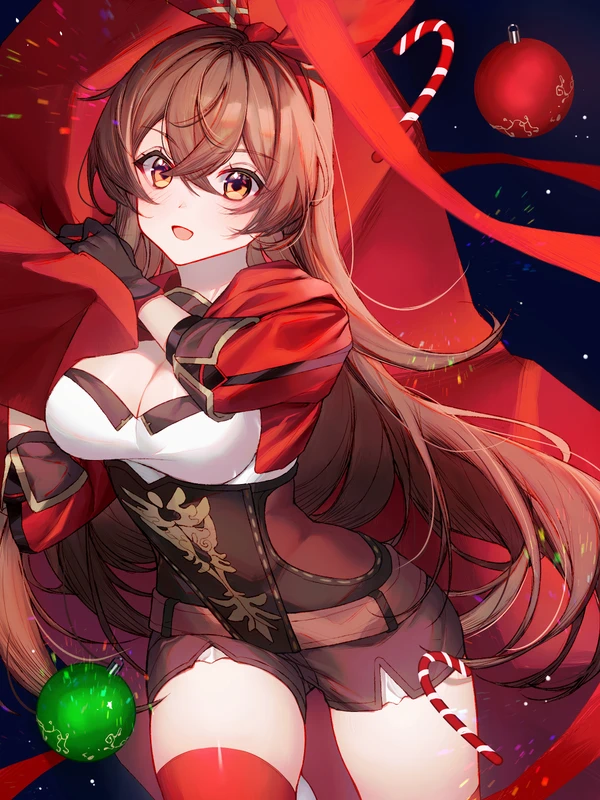

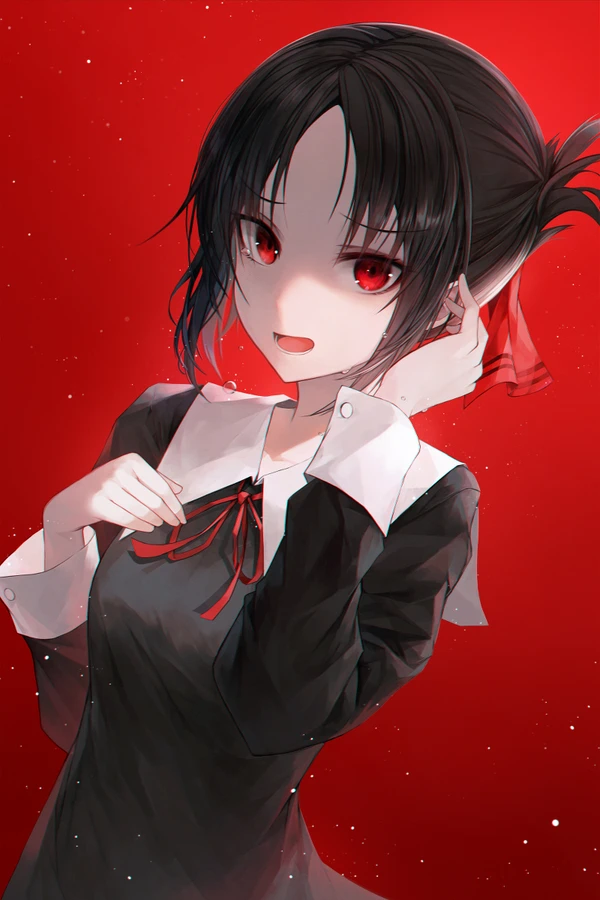

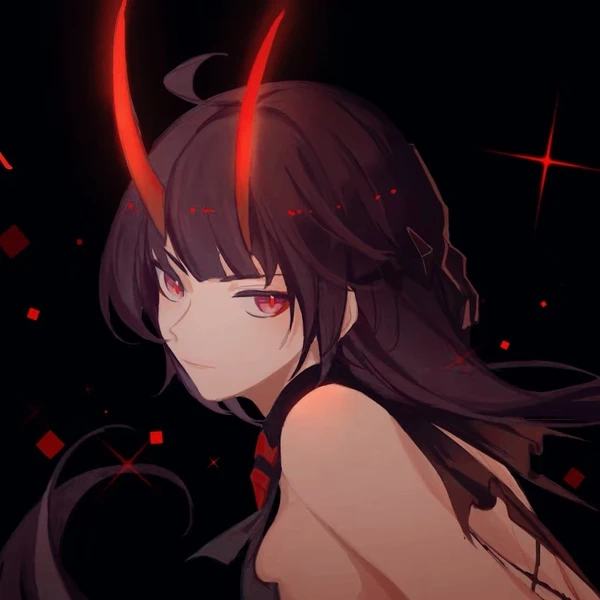

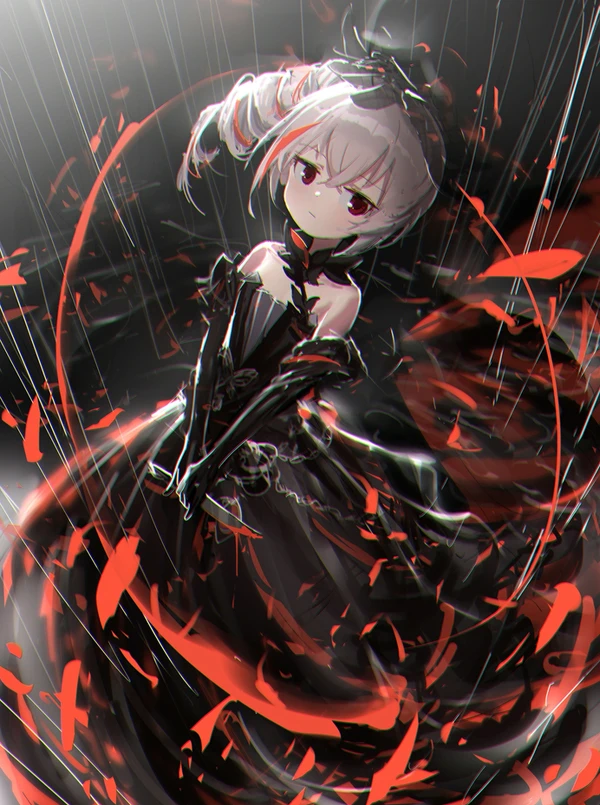

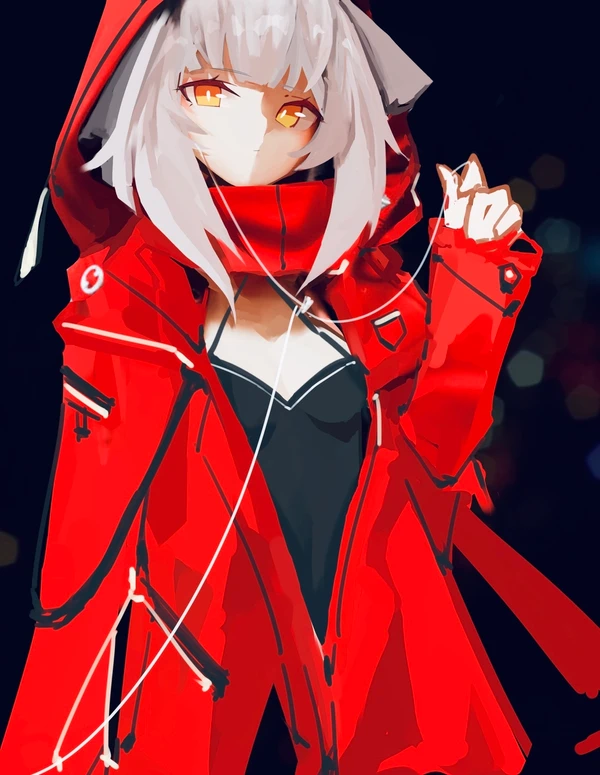

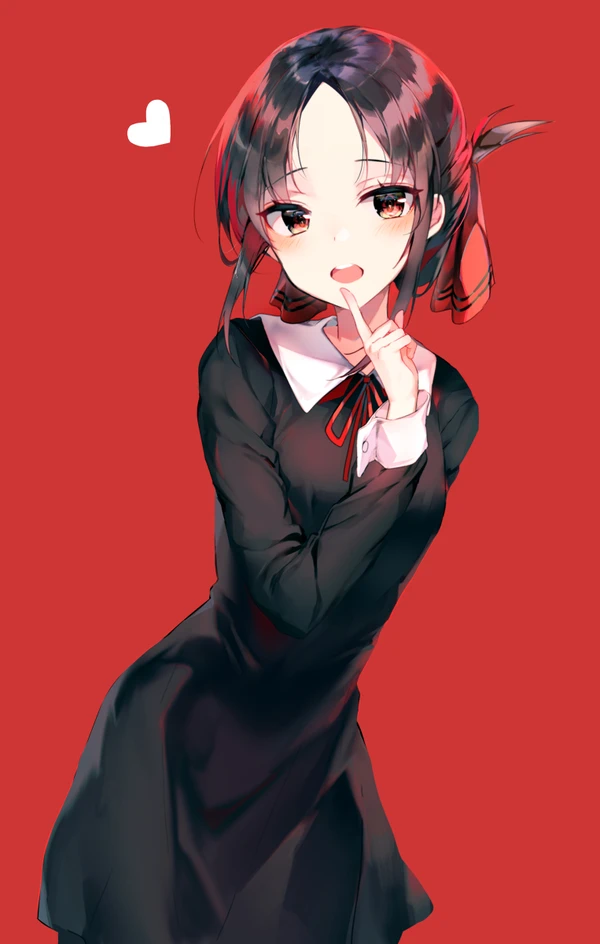

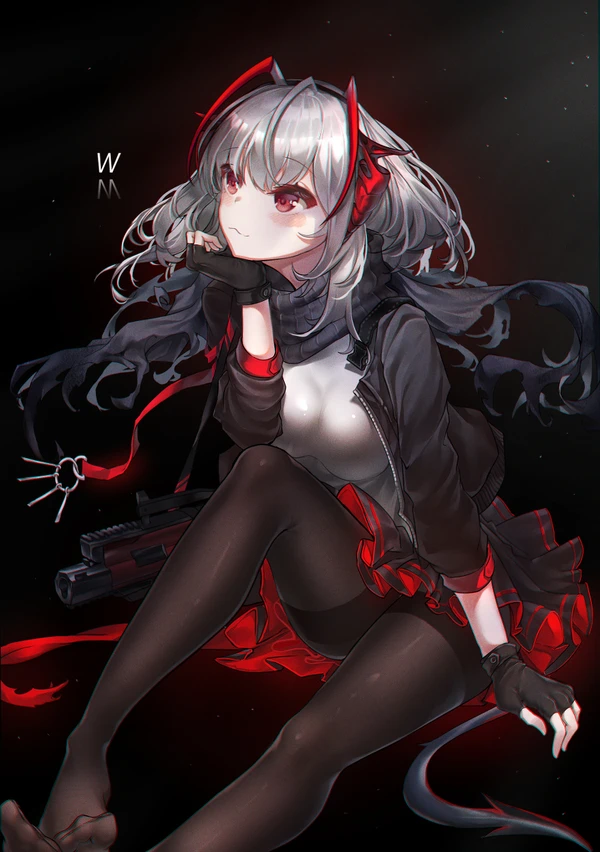

<Figure size 1800x600 with 0 Axes>

In [24]:
# Display top matches
top_k = 7  # Number of images to display
top_n = 20  # Consider the top 50 instead of just top_k

# Add a title to the entire plot
plt.figure(figsize=(18, 6))  # Set the figure size

# Shuffle and pick random images from the top 50 results
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly

# Image folder path
image_folder = "illustration_dataset"

# Display top matches
top_k = 7  # Number of images to display
top_n = 20  # Consider the top 50 instead of just top_k

# Shuffle and pick random images from the top 50 results
random_subset = random.sample(sorted_images[:top_n], top_k)  # Pick top_k randomly

# Image folder path
image_folder = "illustration_dataset"

# Display images as separate figures
for i, (img, score) in enumerate(random_subset):
    image_path = os.path.join(image_folder, img)
    image = Image.open(image_path)
    
    # Display without margins
    display(image)  # This will display the image directly in the notebook

# UI

In [31]:
import tkinter as tk
from PIL import Image, ImageTk
import os
import shutil
from functools import partial

# Create the "Start" screen
def create_start_screen():
    # Create the window
    start_window = tk.Tk()
    start_window.title("Welcome")

    # Add a label for the title
    title_label = tk.Label(start_window, text="Welcome to the Image Grid!", font=("Helvetica", 16))
    title_label.pack(pady=20)

    # Create a start button that transitions to the image grid
    start_button = tk.Button(start_window, text="Start", command=lambda: start_button_clicked(start_window))
    start_button.pack(pady=10)

    # Run the start screen
    start_window.mainloop()

# Function that is called when the start button is clicked
def start_button_clicked(start_window):
    # Close the start window
    start_window.destroy()
    
    # Now display the image grid window
    create_image_grid()


# Function to handle image click (toggle selection)
def on_image_click(img_name, label, img_tk):
    if img_name in selected_images:
        # Image is selected, deselect it
        del selected_images[img_name]
        label.config(bg='red', bd=2)  # Reset background color to unhighlighted, thinner border
    else:
        # Image is not selected, select it
        selected_images[img_name] = True
        label.config(bg='blue', bd=5)  # Set background color to highlight it, thicker border

# Function to copy selected images to the 'copied_images' folder
def copy_selected_images():
    if not selected_images:
        print("No images selected.")
        return

    # Create the "copied_images" folder if it doesn't exist
    if not os.path.exists('copied_images'):
        os.makedirs('copied_images')

    # Loop through the selected images and copy them
    for img_name in selected_images:
        image_path = os.path.join(image_folder, img_name)
        if os.path.exists(image_path):
            dest_path = os.path.join('copied_images', img_name)
            shutil.copy(image_path, dest_path)  # Copy image to the 'copied_images' folder
            print(f"Copied {img_name} to 'copied_images'.")
        else:
            print(f"Image {img_name} not found.")


In [32]:
import tkinter as tk
from PIL import Image, ImageTk
import os
import shutil

# Function to handle image click (toggle selection)
def on_image_click(img_name, label, img_tk):
    if img_name in selected_images:
        # Image is selected, deselect it
        del selected_images[img_name]
        label.config(bg='blue', bd=5)  # Reset background color to unhighlighted, thinner border
    else:
        # Image is not selected, select it
        selected_images[img_name] = True
        label.config(bg='red', bd=2)  # Set background color to highlight it, thicker border

# Function to copy selected images to the 'copied_images' folder
def copy_selected_images():
    if not selected_images:
        print("No images selected.")
        return

    # Create the "copied_images" folder if it doesn't exist
    if not os.path.exists('copied_images'):
        os.makedirs('copied_images')

    # Loop through the selected images and copy them
    for img_name in selected_images:
        image_path = os.path.join(image_folder, img_name)
        if os.path.exists(image_path):
            dest_path = os.path.join('copied_images', img_name)
            shutil.copy(image_path, dest_path)  # Copy image to the 'copied_images' folder
            print(f"Copied {img_name} to 'copied_images'.")
        else:
            print(f"Image {img_name} not found.")

# Folder containing images
image_folder = "illustration_dataset"  # Change to your actual image folder

# Extract the first 10 images from the sorted_images tuple
image_files = [img for img, score in sorted_images[:10]]  # Get only image names

# Function to create the image grid UI
def create_image_grid():
    # Initialize the Tkinter window for the image grid
    root = tk.Tk()
    root.title("Image Grid")

    # Frame to hold the image thumbnails
    image_frame = tk.Frame(root)
    image_frame.pack(padx=10, pady=10)

    # Dictionary to track selected images
    selected_images = {}

    # Create a folder to store copied images if it doesn't exist
    if not os.path.exists('copied_images'):
        os.makedirs('copied_images')

    # Create the "Copy!" button
    copy_button = tk.Button(root, text="Copy!", command=copy_selected_images)
    copy_button.pack(pady=10)

    # Loop through the image files and add them to the grid
    for idx, img_file in enumerate(image_files):
        # Load the image
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path)
        
        # Resize the image to fit the grid
        image.thumbnail((150, 150))  # Resize image to fit in the UI

        # Convert image to Tkinter-compatible format
        img_tk = ImageTk.PhotoImage(image)

        # Create a label to display the image
        label = tk.Label(image_frame, image=img_tk, bg='red', bd=2)  # Set initial background to highlight, thinner border
        label.image = img_tk  # Keep a reference to the image to prevent garbage collection
        
        # Bind the click event to the label (make the image clickable)
        label.bind("<Button-1>", lambda event, name=img_file, label=label, img_tk=img_tk: on_image_click(name, label, img_tk))
        
        # Place the label in the grid
        label.grid(row=idx // 4, column=idx % 4, padx=10, pady=10)  # Adjust grid size

    # Start the Tkinter event loop to display the window
    root.mainloop()

# Create the "Start" screen
def create_start_screen():
    # Create the window
    start_window = tk.Tk()
    start_window.title("Welcome")

    # Add a label for the title
    title_label = tk.Label(start_window, text="Welcome to the Image Grid!", font=("Helvetica", 16))
    title_label.pack(pady=20)

    # Create a start button that transitions to the image grid
    start_button = tk.Button(start_window, text="Start", command=lambda: start_button_clicked(start_window))
    start_button.pack(pady=10)

    # Run the start screen
    start_window.mainloop()

# Function that is called when the start button is clicked
def start_button_clicked(start_window):
    # Close the start window
    start_window.destroy()
    
    # Now display the image grid window
    create_image_grid()




### Older

In [29]:
# Folder containing images
image_folder = "illustration_dataset"  # Change to your actual image folder

# Extract the first 10 images from the sorted_images tuple
image_files = [img for img, score in sorted_images[:10]]  # Get only image names

# Initialize Tkinter window
root = tk.Tk()
root.title("Image Grid")

# Frame to hold the image thumbnails
image_frame = tk.Frame(root)
image_frame.pack(padx=10, pady=10)

# Dictionary to track selected images
selected_images = {}

# Create a folder to store copied images if it doesn't exist
if not os.path.exists('copied_images'):
    os.makedirs('copied_images')

# Create the "Copy!" button
copy_button = tk.Button(root, text="Copy!", command=copy_selected_images)
copy_button.pack(pady=10)

# Loop through the image files and add them to the grid
for idx, img_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(image_folder, img_file)
    image = Image.open(image_path)
    
    # Resize the image to fit the grid
    image.thumbnail((150, 150))  # Resize image to fit in the UI

    # Convert image to Tkinter-compatible format
    img_tk = ImageTk.PhotoImage(image)

    # Create a label to display the image
    label = tk.Label(image_frame, image=img_tk, bg='red', bd=2)  # Set initial background to highlight, thinner border
    label.image = img_tk  # Keep a reference to the image to prevent garbage collection
    
    # Bind the click event to the label (make the image clickable)
    label.bind("<Button-1>", lambda event, name=img_file, label=label, img_tk=img_tk: on_image_click(name, label, img_tk))
    
    # Place the label in the grid
    label.grid(row=idx // 4, column=idx % 4, padx=10, pady=10)  # Adjust grid size

# Start the Tkinter event loop to display the window
root.mainloop()


Copied 81122466_p0_master1200.jpg to 'copied_images'.
Copied 79564520_p0_master1200.jpg to 'copied_images'.
Copied 85513643_p0_master1200.jpg to 'copied_images'.
Copied 81701035_p0_master1200.jpg to 'copied_images'.
Copied 85769338_p0_master1200.jpg to 'copied_images'.
Copied 81365678_p0_master1200.jpg to 'copied_images'.
Copied 86402303_p0_master1200.jpg to 'copied_images'.
Copied 82384617_p0_master1200.jpg to 'copied_images'.


### newer

In [33]:
# Start by showing the welcome screen
create_start_screen()

Copied 81122466_p0_master1200.jpg to 'copied_images'.
Copied 79564520_p0_master1200.jpg to 'copied_images'.
Copied 85513643_p0_master1200.jpg to 'copied_images'.
Copied 81701035_p0_master1200.jpg to 'copied_images'.
